In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Giving file location of our datsets

In [54]:
import os
print(os.getcwd())
# inorder to change directory for direct upload
#os.chdir("C:\Users\harsh\OneDrive\Documents\ML\ML2")

C:\Users\harsh


Loading the datasets

In [57]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [58]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [59]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [60]:
deliveries.shape

(179078, 21)

In [8]:
matches.shape

(756, 18)

Checking Missing Values

In [61]:
matches.isnull()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
754,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
deliveries.isnull()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
179074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
179075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [63]:
matches.drop(['umpire3'],axis=1,inplace=True)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [64]:
matches.season.nunique()

12

In [65]:
print('List of Teams played in IPL :  \n',np.unique(matches[['team1','team2']].values))

List of Teams played in IPL :  
 ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Pune Warriors' 'Rajasthan Royals' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


In [66]:
print('Total number of MATCHES PLAYED :',len(deliveries['match_id'].unique()))
print('Total number of RUNS SCORED by the batsman :',deliveries.total_runs.sum())
print('Total number of WIDE RUNS :',deliveries.wide_runs.sum())
print('Total number of NO-BALL RUNS :',deliveries.noball_runs.sum())
print('Total number of SUPER OVERS :',deliveries[deliveries.is_super_over==1].match_id.nunique())
print('Total number of BYE RUNS :',deliveries.bye_runs.sum())
print('Total number of BATSMAN RUNS :',deliveries.batsman_runs.sum())
print('Total number of LEG-BYE RUNS :',deliveries.legbye_runs.sum())
print('Total number of PENALTY RUNS :',deliveries.penalty_runs.sum())

Total number of MATCHES PLAYED : 756
Total number of RUNS SCORED by the batsman : 235290
Total number of WIDE RUNS : 6576
Total number of NO-BALL RUNS : 749
Total number of SUPER OVERS : 7
Total number of BYE RUNS : 884
Total number of BATSMAN RUNS : 223286
Total number of LEG-BYE RUNS : 3785
Total number of PENALTY RUNS : 10


Number of matches played by each team in each season

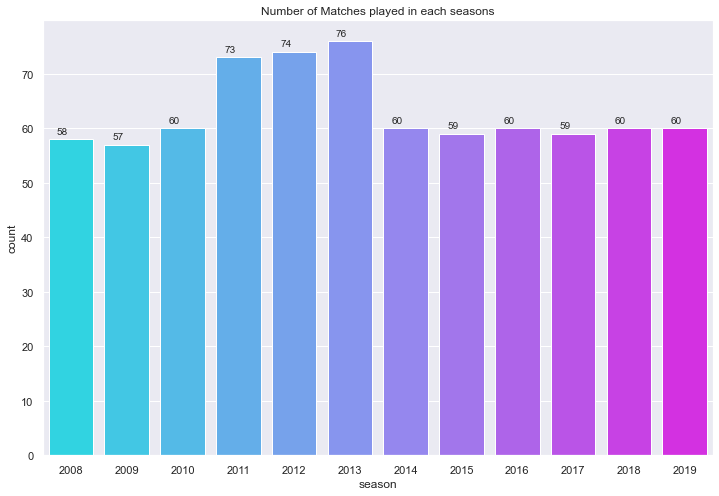

In [67]:
plt.figure(figsize=(12,8))
plt.title('Number of Matches played in each seasons')
ax=sns.countplot(x=matches.season, palette="cool")
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

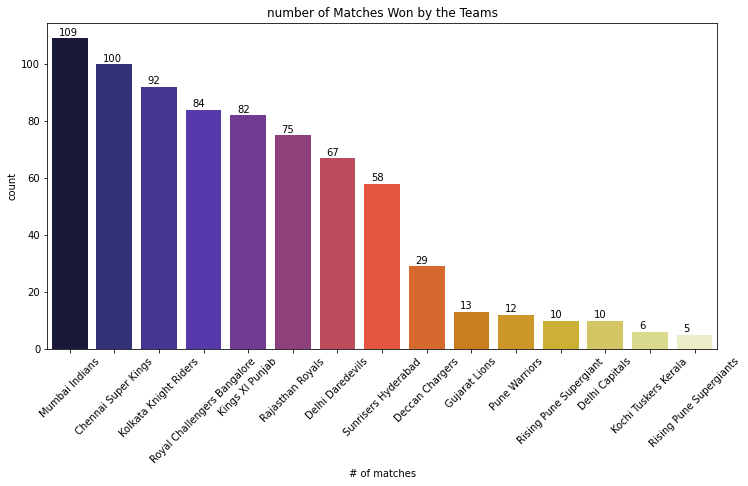

In [21]:
plt.figure(figsize=(12,6))
plt.title('number of Matches Won by the Teams')
ax=sns.countplot(x=matches['winner'],order = matches['winner'].value_counts().index, palette = 'CMRmap')
ax.set_xlabel('# of matches')
plt.xticks(rotation=45)
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

Most man of the matches 

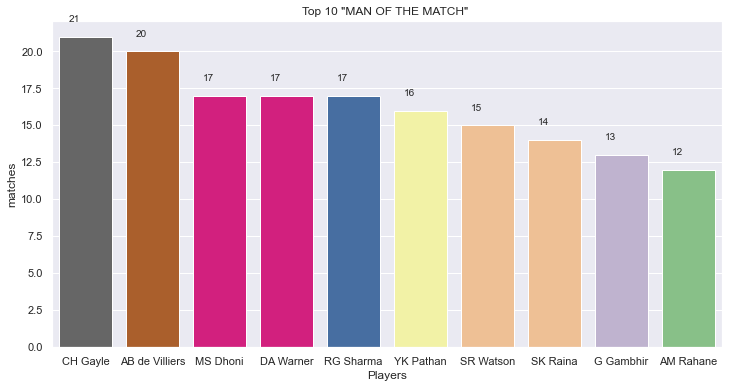

In [69]:
plt.figure(figsize=(12,6))
plt.title('Top 10 "MAN OF THE MATCH" ')
ax=sns.countplot(x=matches.player_of_match,order = matches.player_of_match.value_counts()[:10].index, palette="Accent_r")
ax.set_ylabel('matches')
ax.set_xlabel('Players')
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

most venues utilized

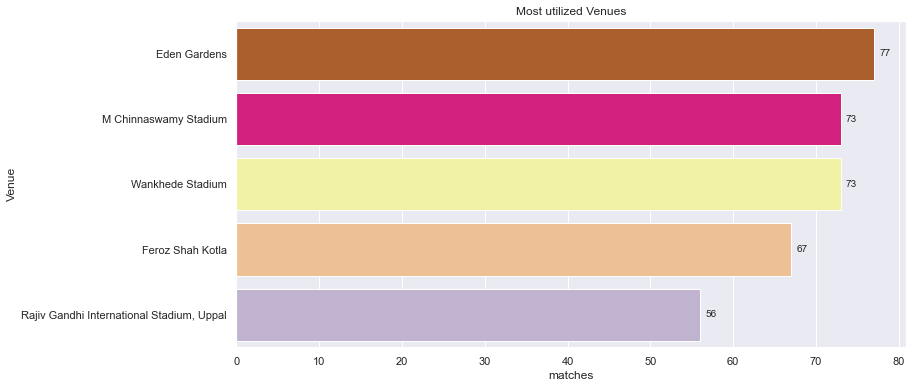

In [70]:
plt.figure(figsize=(12,6))
plt.title('Most utilized Venues')
ax=sns.countplot(y=matches['venue'],order = matches['venue'].value_counts()[0:5].index, palette="Accent_r")
ax.set_xlabel('matches')
for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
ax.set_ylabel('Venue')
plt.show()

Matches played vs Matches won

In [71]:
total_matches= pd.concat([matches.team1,matches.team2])
total_matches = total_matches.value_counts().reset_index()
total_matches.columns = ['Team','Total_Matches']
won_team = matches.winner.value_counts().reset_index()
won_team.columns = ['Team','Matches_won']
win_data= won_team[['Team','Matches_won']].merge(total_matches, left_on = 'Team', right_on = 'Team', how = 'right')
win_data['win_percent'] =  round((win_data.Matches_won/win_data['Total_Matches'])*100,1)

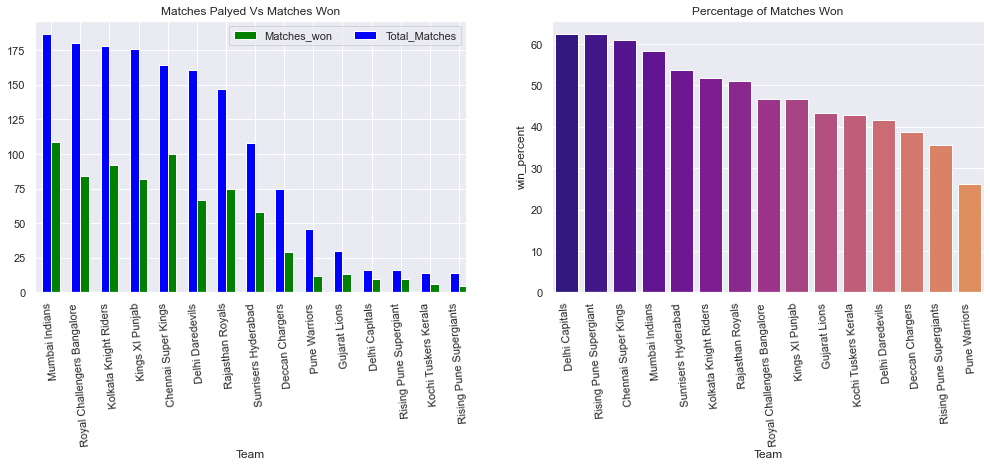

In [72]:
fig, ax =plt.subplots(1,2,figsize=(17,5))
sns.set()
df = win_data.set_index('Team')
width=0.3
df.Matches_won.plot(kind='bar',color='green',ax=ax[0],width=width, position=0)
df.Total_Matches.plot(kind='bar',color='blue',width = width,position=1,ax=ax[0])
ax[0].legend(ncol = 2, loc = 'upper right')
sns.barplot(y='win_percent',x='Team',data=win_data[['Team','win_percent']].sort_values(by='win_percent',ascending=False)
                 ,palette=sns.color_palette('plasma',20),ax=ax[1])
ax[0].tick_params('x', labelrotation=95)
ax[1].tick_params('x', labelrotation=95)
ax[0].set_title('Matches Palyed Vs Matches Won')
ax[1].set_title('Percentage of Matches Won')
plt.show()

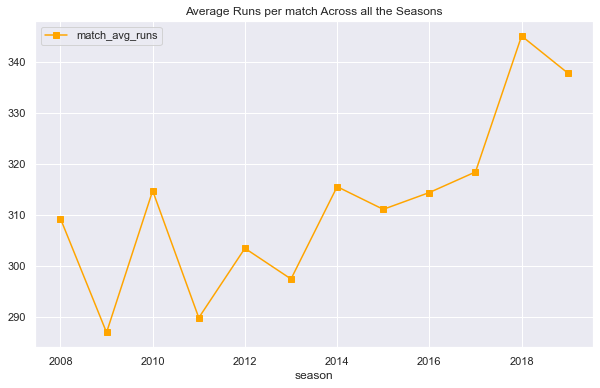

In [73]:
delivery_metrics= matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
x = delivery_metrics.groupby('batting_team')['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs','total_runs'].sum()
x.style.background_gradient(cmap='coolwarm')

temp = delivery_metrics.groupby(['season','match_id'])['total_runs'].sum().reset_index()
temp.columns = ['season','match_id','match_avg_runs']
temp = temp.groupby('season')['match_avg_runs'].mean().reset_index()
cm = plt.cm.get_cmap('hot')
temp.set_index('season').plot(marker='s',color='Orange')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match Across all the Seasons')
plt.show()

Toss decision

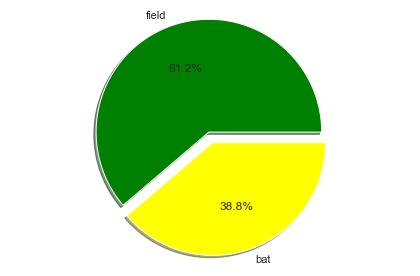

In [74]:
toss_decision = matches.toss_decision.value_counts(normalize=True)
colors = ["green", "yellow"]
explode = (0.05,0.05)
plt.pie(toss_decision,labels=toss_decision.index,autopct='%1.1f%%',explode=explode,colors = colors, shadow = True)
plt.axis('equal')
plt.tight_layout()
plt.show()

Highest wicket taker

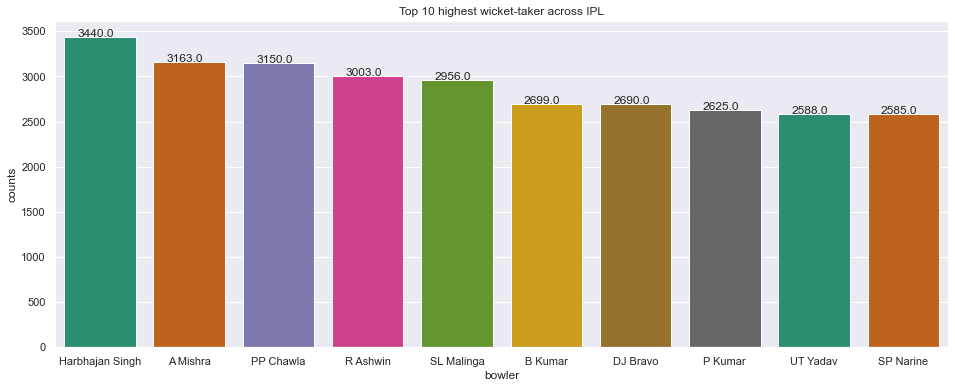

In [75]:
high_wickettaker_all = delivery_metrics[delivery_metrics.player_dismissed != 0]

high_wickettaker_all = high_wickettaker_all[(high_wickettaker_all.dismissal_kind !='retired hurt') & (high_wickettaker_all.dismissal_kind !='obstructing the field'
) & (high_wickettaker_all.dismissal_kind !='run out') ]
high_wickettaker = high_wickettaker_all.bowler.value_counts().reset_index()
high_wickettaker = pd.DataFrame(high_wickettaker)
high_wickettaker.columns = ['bowler','counts']
high_wickettaker = high_wickettaker.sort_values(by='counts',ascending=False)
plt.subplots(figsize=(16,6))
plt.title('Top 10 highest wicket-taker across IPL')
ax = sns.barplot(y='counts',x='bowler',data=high_wickettaker[:10],palette=sns.color_palette('Dark2',50))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

most Purple cap holders

['Rashid Khan'] won the PURPLE CAP in IPL-  2018


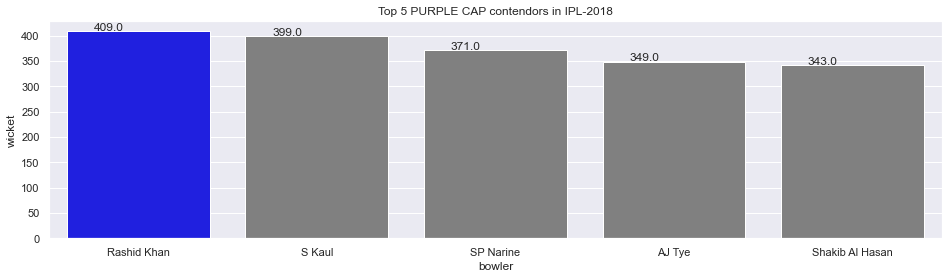

In [77]:
def purple_cap(season):
        purple_cap = high_wickettaker_all[high_wickettaker_all.season==season]
        purple_cap = purple_cap.bowler.value_counts().reset_index()
        purple_cap.columns = ['bowler','wicket']
      #purple_cap.head(5)
        plt.subplots(figsize=(16,4))
        plt.title('Top 5 PURPLE CAP contendors in IPL-'+str(season))
        values = purple_cap.wicket[:5]
        print(str(list(purple_cap.bowler[:1]))+' won the PURPLE CAP in IPL- ',str(season))
        clrs = ['grey' if (x < max(values)) else 'blue' for x in values ]
        ax=sns.barplot(x='bowler', y='wicket',data=purple_cap[:5], palette=clrs) # color=clrs)
        for p in ax.patches:
            ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
        plt.show()
purple_cap(2018)

Most orange cap holders

['KS Williamson'] won the ORANGE CAP in IPL-  2018


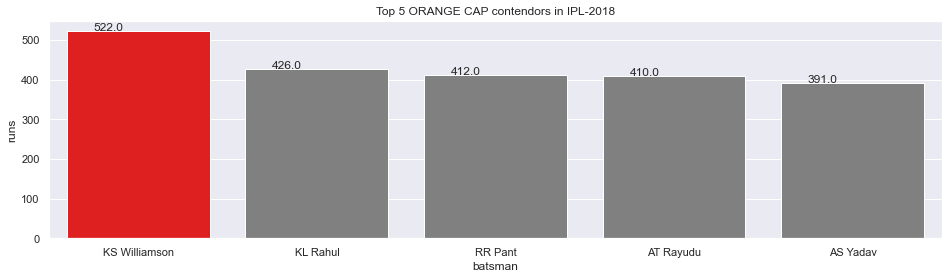

In [78]:
def orange_cap(season):
    orange_cap = delivery_metrics[delivery_metrics.season==season]
    orange_cap = orange_cap.batsman.value_counts().reset_index()
    orange_cap.columns = ['batsman','runs']
    #print(orange_cap.head(5))
    plt.subplots(figsize=(16,4))
    plt.title('Top 5 ORANGE CAP contendors in IPL-'+str(season))
    values = orange_cap.runs[:5]
    print(str(str(orange_cap.batsman[:1].values))+' won the ORANGE CAP in IPL- ',season)
    clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
    ax=sns.barplot(x='batsman', y='runs',data=orange_cap[:5], palette=clrs) # color=clrs)
    for p in ax.patches:
          ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    plt.show()
orange_cap(2018)

<AxesSubplot:xlabel='team1', ylabel='win_by_runs'>

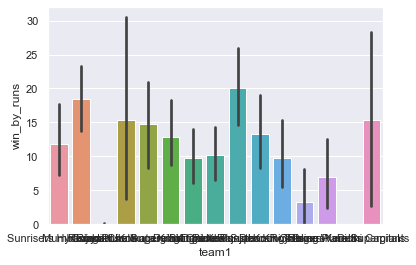

In [79]:
sns.barplot(x='team1',y='win_by_runs',data=matches)